## Problem 2.2 (Exploring fish sleep data)

In [1]:
import numpy as np
import pandas as pd
import itertools

import altair as alt
import bokeh.io

import bebi103
import altair_catplot as altcat

bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
df_gt = pd.read_csv('../data/130315_1A_genotypes.txt',
                    delimiter='\t',
                    comment='#',
                    header=[0, 1])
# Take a look
df_gt.head()

,Genotype1,Genotype2,Genotype3
,WT 17,Het 34,Mut 22
0,2.0,1,4.0
1,14.0,3,11.0
2,18.0,5,12.0
3,24.0,6,13.0
4,28.0,8,20.0


In [4]:
# Reset the columns to be the second level of indexing
df_gt.columns = df_gt.columns.get_level_values(1)

# Check out the new columns
df_gt.columns

Index(['WT 17', 'Het 34', 'Mut 22'], dtype='object')

In [5]:
df_gt.columns = ['wt', 'het', 'mut']

In [6]:
# Tidy the DataFrame
df_gt = pd.melt(df_gt, var_name='genotype', value_name='location')

# Take a look
df_gt.head()

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0


In [7]:
# Drop all rows that have a NaN in them
df_gt = df_gt.dropna()

# Take a look
df_gt.head()

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0


In [8]:
df_gt = df_gt.reset_index(drop=True)

In [9]:
df_gt.loc[:,'location'] = df_gt.loc[:, 'location'].astype(int)

In [10]:
df = pd.read_csv('../data/130315_1A_aanat2.csv', comment='#')

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4
1,2,1.4,2013-03-15 18:31:09,-14.480833,-869,4
2,3,0.0,2013-03-15 18:31:09,-14.480833,-869,4
3,4,0.0,2013-03-15 18:31:09,-14.480833,-869,4
4,5,0.0,2013-03-15 18:31:09,-14.480833,-869,4


In [11]:
df = pd.merge(df, df_gt)

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het


In [12]:
df['time'] = pd.to_datetime(df['time'])

In [13]:
df['time'].dt.time.head()

0    18:31:09
1    18:32:09
2    18:33:09
3    18:34:09
4    18:35:09
Name: time, dtype: object

In [14]:
df['light'] = (  (df['time'].dt.time >= pd.to_datetime('9:00:00').time())
               & (df['time'].dt.time < pd.to_datetime('23:00:00').time()))

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het,True
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het,True
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het,True
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het,True
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het,True


In [15]:
location_1 = df.loc[((df['day'] == 5) & (df['light'] == True)  & (df['location'] == 1)), :]

location_1['activity'].mean()

4.0758661887694165

Now that we've cleaned up the data, let's find the mean activity on day 5 when the light is on and when the light is off for each fish. The goal here is to look at the percentage of fish in each genotype that is in a given state (active, sleep).

In [16]:
grouped = df.loc[df['day']==5].groupby(['location', 'light', 'genotype'])

In [17]:
df_mean = grouped['activity'].mean()

df_mean.head()

location  light  genotype
1         False  het         1.209667
          True   het         4.075866
2         False  wt          0.542500
          True   wt          6.136918
3         False  het         0.517500
Name: activity, dtype: float64

In [18]:
df_mean = df_mean.reset_index()

In [19]:
df_mean = df_mean.rename(columns={'activity' : 'mean_activity'})

In [20]:
df_mean.head()

,location,light,genotype,mean_activity
0,1,False,het,1.209667
1,1,True,het,4.075866
2,2,False,wt,0.542500
3,2,True,wt,6.136918
4,3,False,het,0.517500


In [21]:
# if df_mean['light'] == True
# then divide df_mean['mean_activity'] by df_mean['mean_activity'] of light == False at same location

In [55]:
night_act = df_mean.loc[df_mean['light']==False, 'mean_activity']
day_act = df_mean.loc[df_mean['light']==True, 'mean_activity']

norm_day_activity = np.divide(day_act,night_act)
norm_night_actvity = np.divide(night_act,night_act)

In [56]:
df_day = df_mean.loc[df_mean['light']==True, :]
df_night = df_mean.loc[df_mean['light']==False, :]

In [57]:
df_day['norm_mean_activity'] = norm_day_activity
df_night['norm_mean_activity'] = norm_night_actvity

/Users/madelynw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/madelynw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
df_day.head()

,location,light,genotype,mean_activity,norm_mean_activity
1,1,True,het,4.075866,3.369413
3,2,True,wt,6.136918,11.312290
5,3,True,het,2.628196,5.078639
7,4,True,mut,5.033572,2.746584
9,5,True,het,7.671924,6.867304


In [59]:
df_night.head()

,location,light,genotype,mean_activity,norm_mean_activity
0,1,False,het,1.209667,1.0
2,2,False,wt,0.542500,1.0
4,3,False,het,0.517500,1.0
6,4,False,mut,1.832667,1.0
8,5,False,het,1.117167,1.0


In [60]:
df_merged = pd.concat([df_day, df_night])

In [61]:
df_merged = df_merged.sort_values(['location', 'light'])

In [62]:
df_merged.head()

,location,light,genotype,mean_activity,norm_mean_activity
0,1,False,het,1.209667,1.000000
1,1,True,het,4.075866,3.369413
2,2,False,wt,0.542500,1.000000
3,2,True,wt,6.136918,11.312290
4,3,False,het,0.517500,1.000000


In [63]:
df_mean.head()

,location,light,genotype,mean_activity
0,1,False,het,1.209667
1,1,True,het,4.075866
2,2,False,wt,0.542500
3,2,True,wt,6.136918
4,3,False,het,0.517500


Now we can compare the median activity from day to night for each fish. 

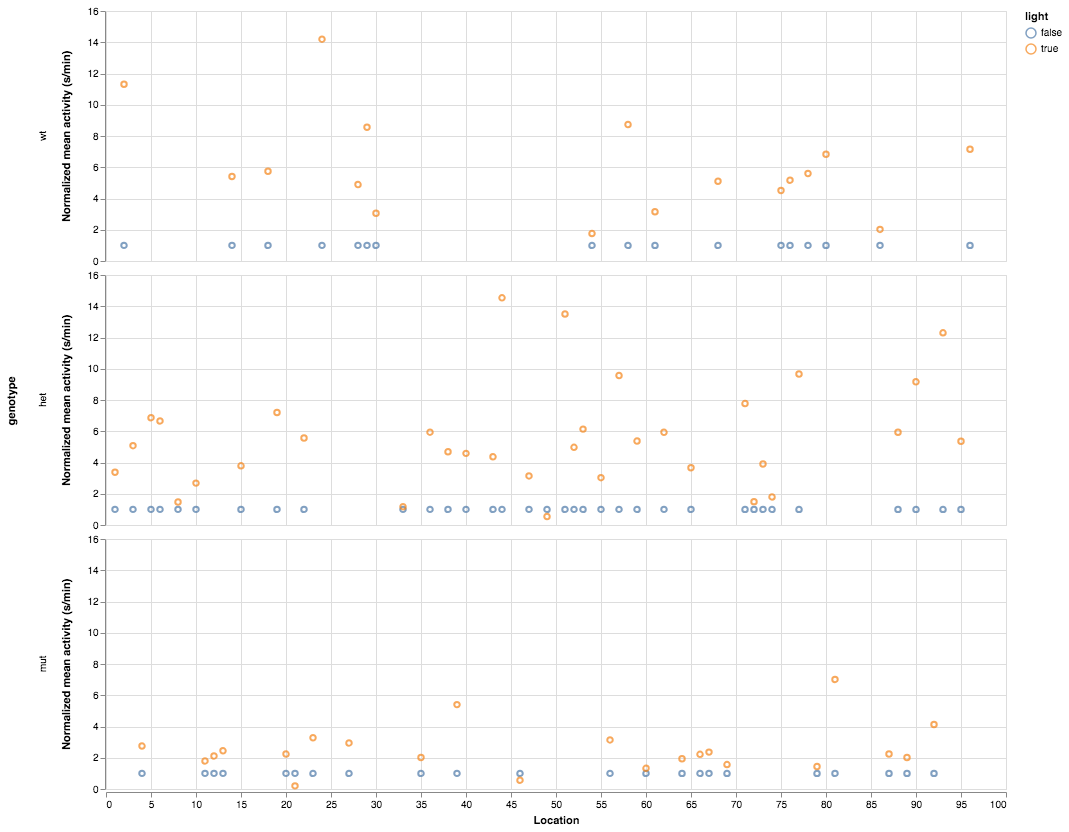

In [64]:
# plot the normalized mean activity for each location through light/dark cycle
alt.Chart(df_merged, height=250, width=900
         ).mark_point(
         ).encode(
             x=alt.X('location:Q', title='Location'),
             y=alt.Y('norm_mean_activity:Q', title='Normalized mean activity (s/min)'),
             color ='light:N',
             row = alt.Row('genotype:N', sort=['wt', 'het', 'mut'])
         )

In [40]:
axis_scale = alt.Scale(domain=[0,50])

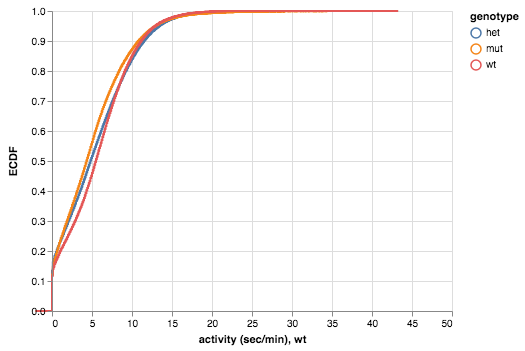

In [41]:
# use this

altcat.catplot(data=df.loc[df['light']==True, :],
               mark='line',
               encoding=dict(x = alt.X('activity:Q', scale=axis_scale, title='activity (sec/min), wt'),
                             color = alt.Color('genotype:N')),
               transform = 'ecdf')

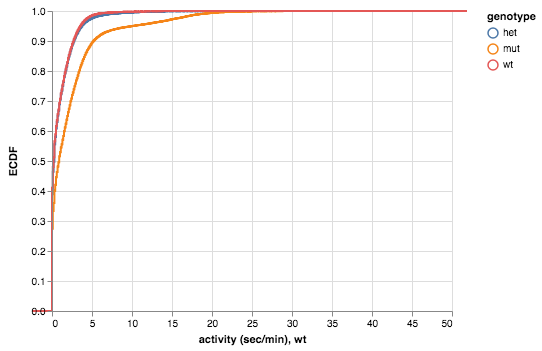

In [42]:
# use this

altcat.catplot(data=df.loc[df['light']==False, :],
               mark='line',
               encoding=dict(x = alt.X('activity:Q', scale=axis_scale, title='activity (sec/min), wt'),
                             color = alt.Color('genotype:N')),
               transform = 'ecdf')

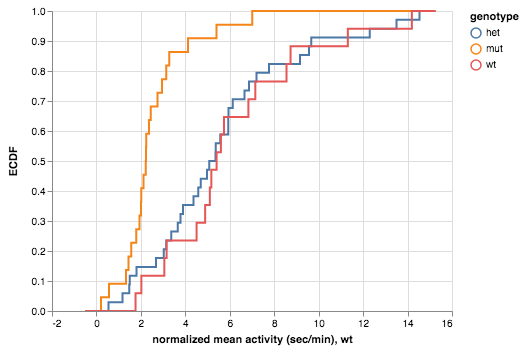

In [54]:
# use this one

altcat.catplot(data=df_day,
               mark='line',
               encoding=dict(x = alt.X('norm_mean_activity:Q', title='normalized mean activity (sec/min), wt'),
                             color = alt.Color('genotype:N')),
               transform = 'ecdf')

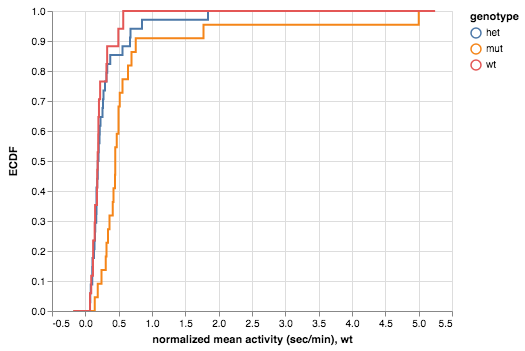

In [73]:
altcat.catplot(data=df_night,
               mark='line',
               encoding=dict(x = alt.X('norm_mean_activity:Q', title='normalized mean activity (sec/min), wt'),
                             color = alt.Color('genotype:N')),
               transform = 'ecdf')

In [65]:
night_act = df_mean.loc[df_mean['light']==False, 'mean_activity']
day_act = df_mean.loc[df_mean['light']==True, 'mean_activity']

norm_day_activity = np.divide(day_act,day_act)
norm_night_actvity = np.divide(night_act,day_act)

In [66]:
df_day = df_mean.loc[df_mean['light']==True, :]
df_night = df_mean.loc[df_mean['light']==False, :]

In [67]:
df_day['norm_mean_activity'] = norm_day_activity
df_night['norm_mean_activity'] = norm_night_actvity

/Users/madelynw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/madelynw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
df_day.head()

,location,light,genotype,mean_activity,norm_mean_activity
1,1,True,het,4.075866,1.0
3,2,True,wt,6.136918,1.0
5,3,True,het,2.628196,1.0
7,4,True,mut,5.033572,1.0
9,5,True,het,7.671924,1.0


In [69]:
df_night.head()

,location,light,genotype,mean_activity,norm_mean_activity
0,1,False,het,1.209667,0.296788
2,2,False,wt,0.542500,0.088399
4,3,False,het,0.517500,0.196903
6,4,False,mut,1.832667,0.364089
8,5,False,het,1.117167,0.145618


In [70]:
df_merged = pd.concat([df_day, df_night])

In [71]:
df_merged = df_merged.sort_values(['location', 'light'])

In [72]:
df_merged.head()

,location,light,genotype,mean_activity,norm_mean_activity
0,1,False,het,1.209667,0.296788
1,1,True,het,4.075866,1.000000
2,2,False,wt,0.542500,0.088399
3,2,True,wt,6.136918,1.000000
4,3,False,het,0.517500,0.196903


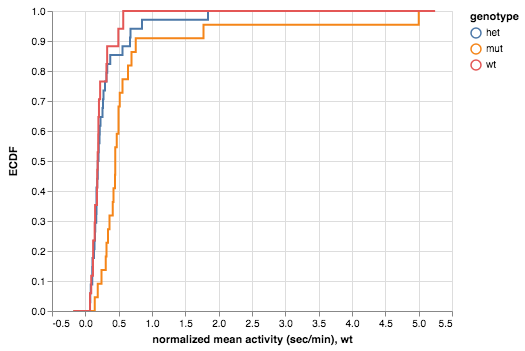

In [73]:
altcat.catplot(data=df_night,
               mark='line',
               encoding=dict(x = alt.X('norm_mean_activity:Q', title='normalized mean activity (sec/min), wt'),
                             color = alt.Color('genotype:N')),
               transform = 'ecdf')

In [34]:
# p1 = altcat.catplot(data=df_day.loc[df_day['genotype']=='wt', :],
#                mark='line',
#                encoding=dict(x = alt.X('norm_mean_activity:Q', scale=axis_scale, title='normalized mean activity (sec/min), wt'),
#                              color = alt.Color('light:N')),
#                transform = 'ecdf')

# p2 = altcat.catplot(data=df_day.loc[df_day['genotype']=='het', :],
#                mark='line',
#                encoding=dict(x = alt.X('norm_mean_activity:Q', scale=axis_scale, title='normalized mean activity (sec/min), wt'),
#                              color = alt.Color('light:N')),
#                transform = 'ecdf')

# p3 = altcat.catplot(data=df_day.loc[df_day['genotype']=='mut', :],
#                mark='line',
#                encoding=dict(x = alt.X('norm_mean_activity:Q', scale=axis_scale, title='normalized mean activity (sec/min), wt'),
#                              color = alt.Color('light:N')),
#                transform = 'ecdf')

# p1 + p2 + p3

NameError: name 'axis_scale' is not defined

In [ ]:
# plot the mean activity for each location through light/dark cycle
alt.Chart(df_mean, height=250, width=900
         ).mark_point(
         ).encode(
             x=alt.X('location:Q', title='Location'),
             y=alt.Y('mean_activity:Q', title='Mean activity (s/min)'),
             color ='light:N',
             row = alt.Row('genotype:N', sort=['wt', 'het', 'mut'])
         )